# project : Heart Disease -( Classifications) 


# I. Definition


1-Project Overview:

heart disease problem  is an important real world problem , Those infected with these diseases are increasing. It is not only the elderly, but also the children.

2-Problem Statement:

helping in speed up the discovery of those diseases to reduce the deterioration of the condition of patients and accelerate the treatment and save their lives using this project.
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.  using some algorithms and techniques.

3-Metrics:

In medical model totally need to avoid false negatives.
F-score measures this trade-off between precise prediction vs avoiding false negatives. Its definition can be arbitrary depending upon your classifier, lets assume it is defined as the average between precision and true positive rate.
This is not a very good F-score measure because you can have huge recall value, and very low precision [eg predicting all cases positive] and you will still end up with an F-score which is same that when your precision and recall are well balanced.
Define F score as :
              2 * (Precision * Recall) / (Precision + Recall) 
        


## II. Analysis

### Data Exploration:
    
We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not.
let's  start to see our data  .

In [1]:
#import python libraries which we will need
#pandas: reading dataset into a data frame.
#numpy :to make mathematical manipulation on data easily and speed 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

In [18]:
#read the data
data = pd.read_csv('C:\\Users\shaimaa\Desktop\medical data\heart diseases\heart.csv')
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [3]:
data.shape

(303, 14)

The dataset contains the following features:
1. age(in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


check about null data

In [20]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

very good data  is clean and has no null values 

In [162]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The features described in the above data set are:

1. Count tells us the number of NoN-empty rows in a feature.

2. Mean tells us the mean value of that feature.

3. Std tells us the Standard Deviation Value of that feature.

4. Min tells us the minimum value of that feature.

5. 25%, 50%, and 75% are the percentile/quartile of each features.

6. Max tells us the maximum value of that feature.

Preparing the Data:


Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

In [21]:
# Split the data into features and target label
target=data['target']
features=data.drop('target',axis=1)
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [22]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [165]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Exploratory Visualization:

Correlation Heat Map

The correlation matrix
A correlation matrix is a table showing the value of the correlation coefficient (Correlation coefficients are used in statistics to measure how strong a relationship is between two variables. ) between sets of variables. Each attribute of the dataset is compared with the other attributes to find out the correlation coefficient. This analysis allows you to see which pairs have the highest correlation, the pairs which are highly correlated represent the same variance of the dataset thus we can further analyze them to understand which attribute among the pairs are most significant for building the model.

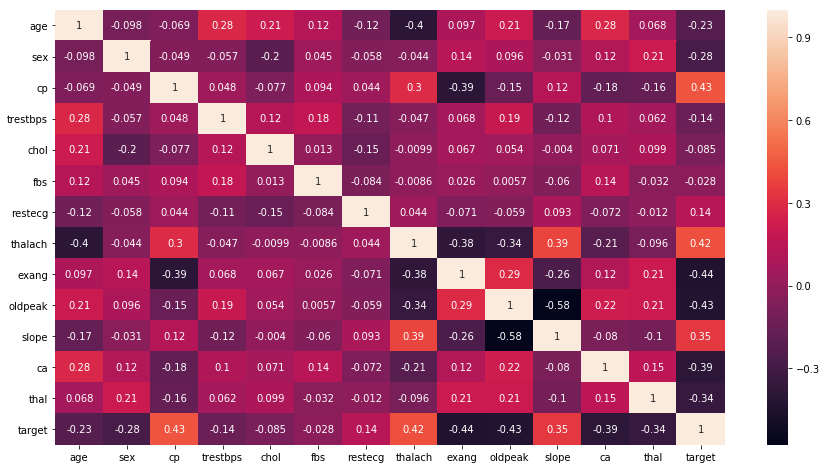

In [23]:
import seaborn as sns
fig = plt.gcf()
fig.set_size_inches(15, 8)
sns.heatmap(data.corr(), annot = True)
plt.show()

There is no features with more than 0.5 correlation. 


# visualization

Distributions:

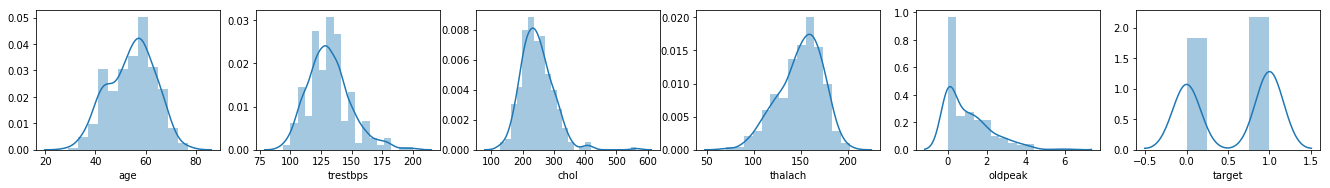

In [167]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
number_of_columns = len(continuous_features)
number_of_rows = 5
plt.figure(figsize=(23, 18))

for i, f in enumerate(continuous_features):
    plt.subplot(number_of_rows + 1, number_of_columns, i + 1)
    sns.distplot(data[f], kde=True)

The features Age, trestbps, chol are normally distributed.

The target variable is balanced.


## visualization using  pairs plot

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship   between two variables. 

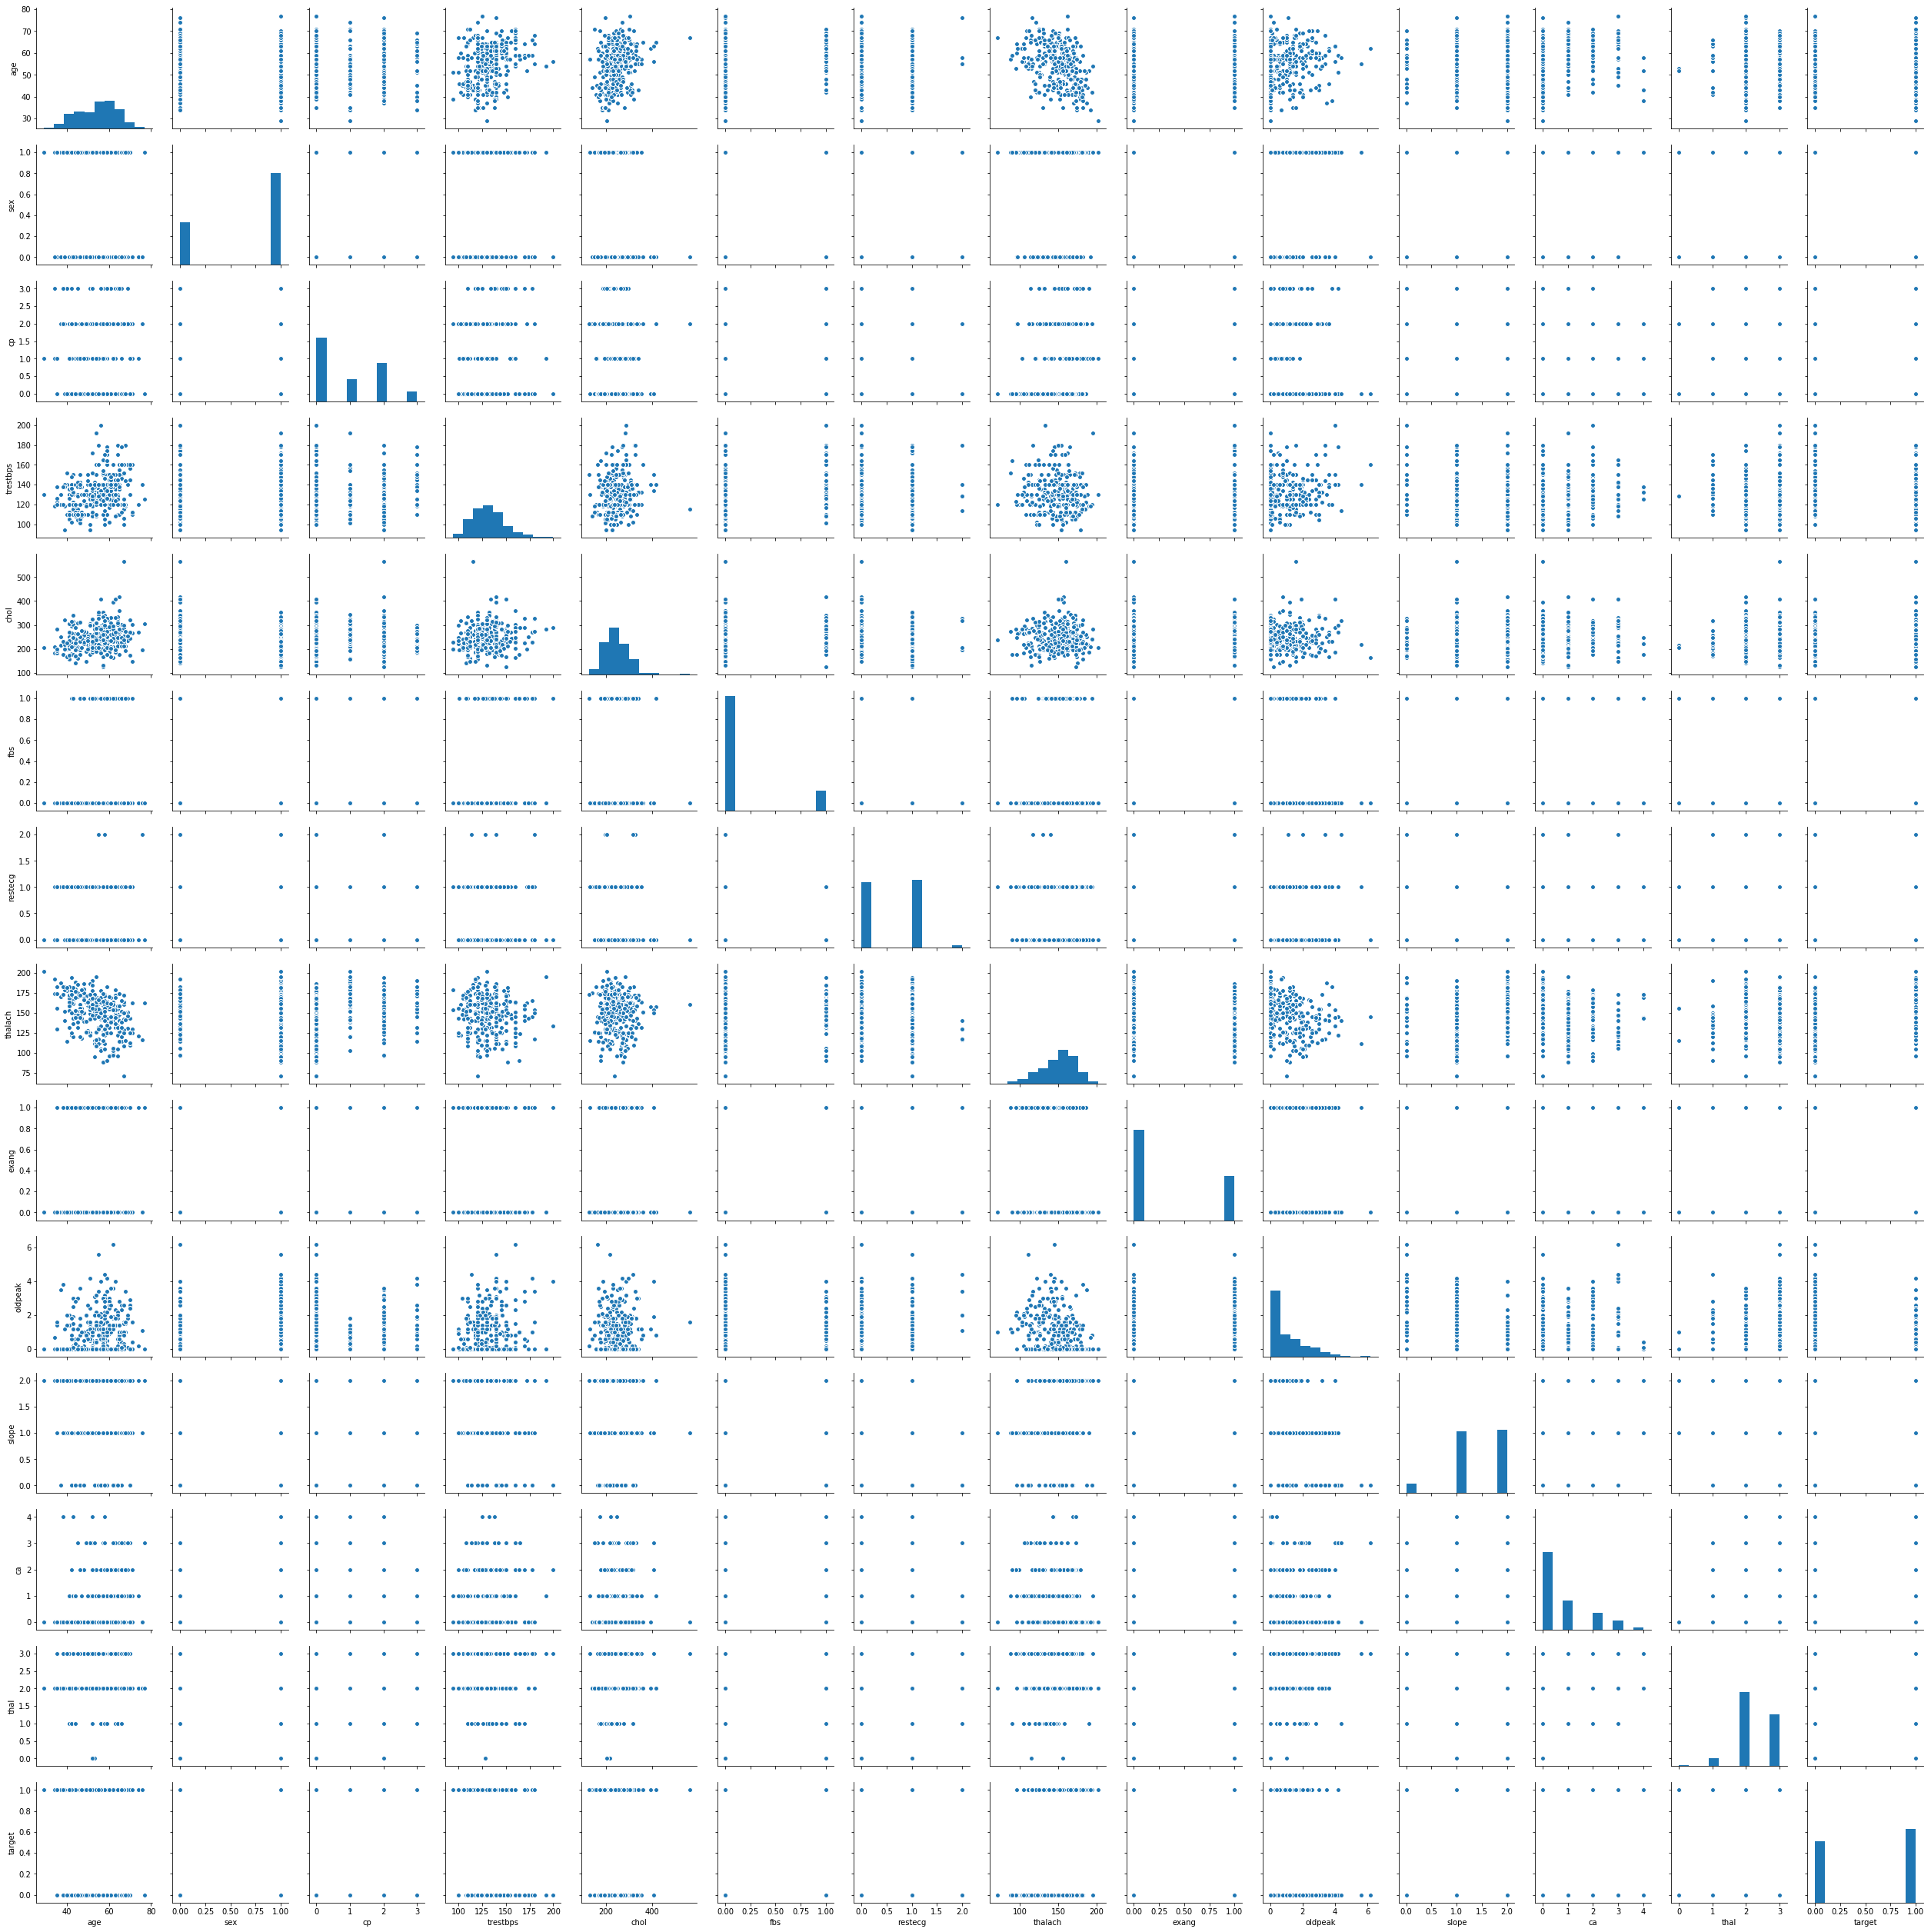

In [169]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

# Data Preprocessing

in this section, you will preprocess the data to create a better representation by performing a scaling on the data and detecting  outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

## Outlier Detection

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers] An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

In [24]:
all_outliers_idx = []
# For each feature find the data points with extreme high or low values
for feature in data.keys():
    
    #  Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature],25)
    
    #  Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature],75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
    display(feature_outliers)
    # save all outliers indecies in a list
    for idx in list(feature_outliers.index):
        all_outliers_idx.append(idx)
# OPTIONAL: Select the indices for data points you wish to remove
outliers =[]
# if outlier index is common between two features or more save it in outliers list to remove it.
for idx in set(all_outliers_idx):
    if all_outliers_idx.count(idx) > 1:
        outliers.append(idx)
outliers.sort()
print("outlier indecies = ", outliers)
# Remove the outliers, if any were specified
n_data =data.drop(data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'age':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Data points considered outliers for the feature 'sex':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Data points considered outliers for the feature 'cp':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Data points considered outliers for the feature 'trestbps':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


Data points considered outliers for the feature 'chol':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


Data points considered outliers for the feature 'fbs':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1


Data points considered outliers for the feature 'restecg':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Data points considered outliers for the feature 'thalach':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


Data points considered outliers for the feature 'exang':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Data points considered outliers for the feature 'oldpeak':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


Data points considered outliers for the feature 'slope':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


Data points considered outliers for the feature 'ca':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0


Data points considered outliers for the feature 'thal':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


Data points considered outliers for the feature 'target':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


outlier indecies =  [8, 28, 97, 99, 101, 203, 204, 217, 220, 223, 231, 250, 251, 252, 260, 281, 291]


In [193]:
n_data.shape

(286, 14)

## Normalizing Numerical Features

it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution; however, normalization ensures that each feature is treated equally when applying supervised learners.

 We will use sklearn.preprocessing.MinMaxScaler for this.

In [25]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

features_log_minmax_transform = pd.DataFrame(data = n_data)
features_log_minmax_transform[numerical] = scaler.fit_transform(n_data[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.520408,0.244292,1.0,0.0,0.603053,0.0,0.410714,0.0,0.0,0.333333,1
1,0.166667,1.0,0.666667,0.367347,0.283105,0.0,0.5,0.885496,0.0,0.625000,0.0,0.0,0.666667,1
2,0.250000,0.0,0.333333,0.367347,0.178082,0.0,0.0,0.770992,0.0,0.250000,1.0,0.0,0.666667,1
3,0.562500,1.0,0.333333,0.265306,0.251142,0.0,0.5,0.816794,0.0,0.142857,1.0,0.0,0.666667,1
4,0.583333,0.0,0.000000,0.265306,0.520548,0.0,0.5,0.702290,1.0,0.107143,1.0,0.0,0.666667,1


In [27]:
y=n_data['target']
X=n_data.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.520408,0.244292,1.0,0.0,0.603053,0.0,0.410714,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.367347,0.283105,0.0,0.5,0.885496,0.0,0.625000,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.367347,0.178082,0.0,0.0,0.770992,0.0,0.250000,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.265306,0.251142,0.0,0.5,0.816794,0.0,0.142857,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.265306,0.520548,0.0,0.5,0.702290,1.0,0.107143,1.0,0.00,0.666667
5,0.583333,1.0,0.000000,0.469388,0.150685,0.0,0.5,0.587786,0.0,0.071429,0.5,0.00,0.333333
6,0.562500,0.0,0.333333,0.469388,0.383562,0.0,0.0,0.625954,0.0,0.232143,0.5,0.00,0.666667
7,0.312500,1.0,0.333333,0.265306,0.312785,0.0,0.5,0.778626,0.0,0.000000,1.0,0.00,1.000000
8,0.583333,1.0,0.666667,0.571429,0.095890,0.0,0.5,0.786260,0.0,0.285714,1.0,0.00,0.666667
9,0.520833,1.0,0.000000,0.469388,0.257991,0.0,0.5,0.679389,0.0,0.214286,1.0,0.00,0.666667


# Implementation: Data Preprocessing

### Shuffle and Split Data

we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [28]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'target' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 228 samples.
Testing set has 58 samples.


## Evaluating Model Performance
here we will investigate four different algorithms, and determine which is best at modeling the data.

Evaluating Metrics:
fscore:
In medical model totally need to avoid false negatives. F-score measures this trade-off between precise prediction vs avoiding false negatives. Its definition can be arbitrary depending upon your classifier, lets assume it is defined as the average between precision and true positive rate. This is not a very good F-score measure because you can have huge recall value, and very low precision [eg predicting all cases positive] and you will still end up with an F-score which is same that when your precision and recall are well balanced. Define F score as : 2 (Precision Recall) / (Precision + Recall) .
 Accuracy :
 measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).
 accuracy=(TP + TN) / (FP + TP + FN + TN)

### Supervised Learning Models
The following are some of the supervised learning models that are currently available in scikit-learn :

*Decision Trees.
*AdaBoost.
*K-Nearest Neighbors (KNeighbors).
*Support Vector Machines (SVM).
*Logistic Regression.

i will use these algorithms then compare them to get the best result

## DecisionTreeClassifier

In [30]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictions_test = dtc.predict(X_test)
predictions_train = dtc.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=2.0)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=2.0)
#print results
print('accuracy on test set:',results_acc_test )
print(' F-score on the test:',results_f_test)

accuracy on test set: 0.706896551724
 F-score on the test: 0.737179487179


## AdaBoostClassifier

In [31]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import AdaBoostClassifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
AD =AdaBoostClassifier(random_state=1)
AD.fit(X_train,y_train)
predictions_test = AD.predict(X_test)
predictions_train = AD.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=2)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=2)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)

accuracy on test set: 0.775862068966
 F-score on the test: 0.84375


## Logistic regression

In [37]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import LogisticRegression Classifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#initalize  LogisticRegression model
lg =LogisticRegression(random_state=1)
lg.fit(X_train,y_train)
predictions_test = lg.predict(X_test)
predictions_train = lg.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test= accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=2.0)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=2.0)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)


accuracy on test set: 0.827586206897
 F-score on the test: 0.920245398773


## Support Vector Machines (SVM)

In [33]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import SVC Classifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
#initalize svm model
sv = SVC(random_state=1)
sv.fit(X_train,y_train)
predictions_test = sv.predict(X_test)
predictions_train = sv.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=2.0)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=2.0)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)



accuracy on test set: 0.810344827586
 F-score on the test: 0.895061728395


## KNN

In [34]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
# Import KNeighbors Classifier
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)
predictions_test = classifier_knn.predict(X_test)
predictions_train = classifier_knn.predict(X_train)
#  Compute accuracy on the  training samples which is y_train
results_acc_train = accuracy_score( y_train,predictions_train)
        
#  Compute accuracy on test set using accuracy_score()
results_acc_test = accuracy_score(y_test,predictions_test)
    
#Compute F-score on the the training samples using fbeta_score()
results_f_train = fbeta_score(y_train,predictions_train,average='binary',beta=2.0)
        
# Compute F-score on the test set which is y_test
results_f_test = fbeta_score(y_test,predictions_test,average='binary',beta=2.0)
#print results
print('accuracy on test set:',results_acc_test)
print(' F-score on the test:',results_f_test)

accuracy on test set: 0.844827586207
 F-score on the test: 0.90625


## Comparing Models


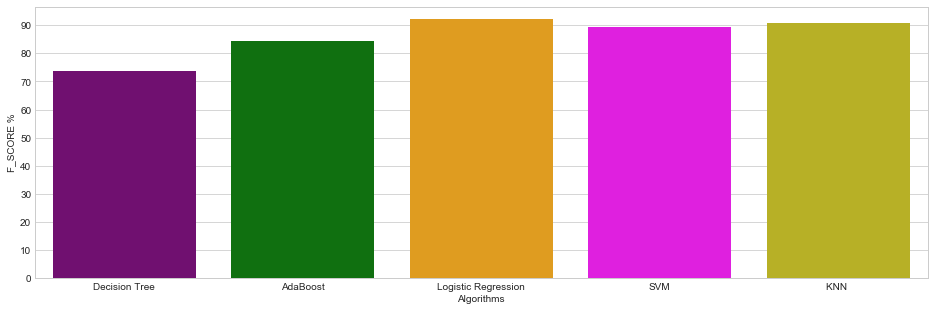

In [35]:
methods = ["Decision Tree","AdaBoost","Logistic Regression","SVM", "KNN "]
F_SCORE = [73.71, 84.37, 92.02, 89.50,90.62]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("F_SCORE %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=F_SCORE, palette=colors)
plt.show()

 models work fine but best of them is Logistic Regression

## Conclusion:
    
Logistic Regression gives the hightest accuracy and f-score between the other algorithems ,and it's f_score result is better than benchmark result


In [ ]:
    max_depth = np.arange(6)

plt.figure(figsize=(7, 5))

    plt.title('different models performance on training and testing using f2score evaluation metrics')
    plt.plot(max_depth, training, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, testing, 'o-', color = 'g', label = 'testing Score')
    
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('models number from model  0 to 6 ')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()